In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

#from numba import jit,prange

import time
import os

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
test_load = nib.load('/Users/rodrigo/Side-Projects/Ayahuasca/Data/Controle/O/2/after/swau2_RS.nii').get_fdata()


In [46]:
test_load.shape

(91, 109, 91, 213)

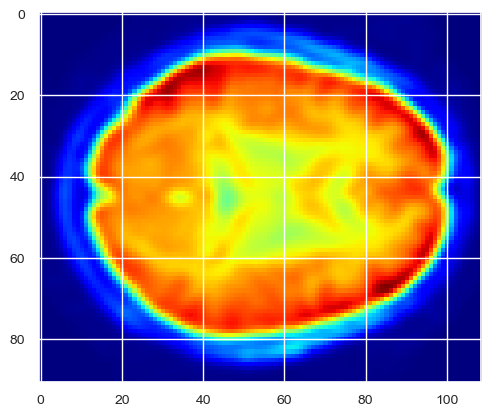

In [47]:
test = test_load[:,:,40,20]
plt.imshow(test, cmap='jet')
plt.show()

#### test = test_load[:,:,25,]
plt.imshow(test, cmap='jet')
plt.show()

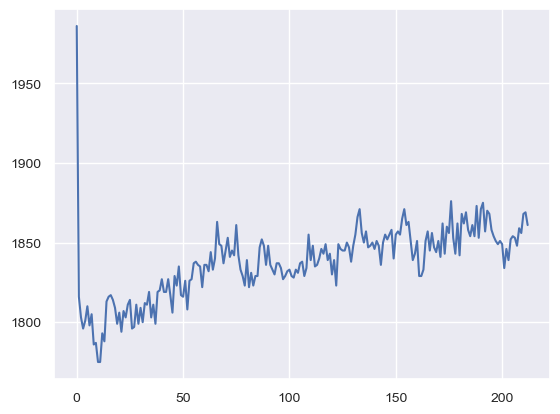

In [48]:
plt.plot(test_load[40,40,40,:])

In [67]:
GOR = nib.load('/Users/rodrigo/Side-Projects/Ayahuasca/Parcels_MNI_333.nii')#.get_fdata()
test_load = nib.load('/Users/rodrigo/Side-Projects/Ayahuasca/Data/Controle/O/2/before/swau2_RS.nii')

In [68]:
print(len(np.unique(GOR.get_fdata())))

334


In [69]:
np.sum(GOR.get_fdata() == 258.)

42

334


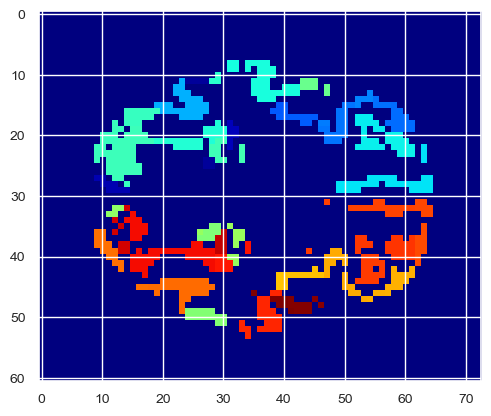

In [70]:
test = GOR.get_fdata()[:,:,20,0]
plt.imshow(test, cmap='jet')
print(len(np.unique(GOR.get_fdata())))
plt.show()

In [71]:
from nilearn import image as nimg

# Print dimensions of functional image and atlas image

print("Size of functional image:", test_load.shape)
print("Size of atlas image:", GOR.shape)

resampled_GOR = nimg.resample_to_img(GOR, test_load, interpolation = 'nearest', fill_value=0)

print('Resampled CON', resampled_GOR.shape)

Size of functional image: (91, 109, 91, 213)
Size of atlas image: (61, 73, 61, 1)
Resampled CON (91, 109, 91, 1)


In [72]:
resampled = nimg.resample_img(GOR, test_load.affine,target_shape=(64,64,35), interpolation = 'nearest', fill_value=0)
print(len(np.unique(resampled.get_fdata())))

168


### Why number of ROIs decrease?

In [73]:
print(len(np.unique(resampled_GOR.get_fdata())))

312


In [74]:
np.unique(resampled_GOR.get_fdata())

array([  0.,   1.,   2.,   3.,   4.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  91.,  92.,  94.,  96.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 16

Some ROIS disapear. It drops ROIS that are  empty.

334


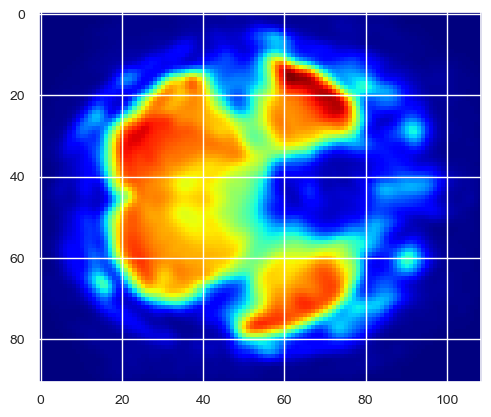

In [76]:
test = test_load.get_fdata()[:,:,22,10]
plt.imshow(test, cmap='jet')
print(len(np.unique(GOR.get_fdata())))
plt.show()

334


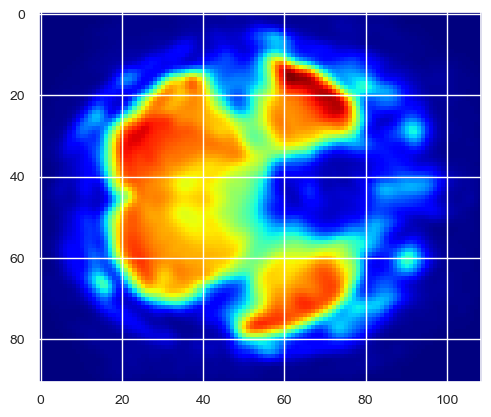

In [77]:
test = test_load.get_fdata()[:,:,22,10]
plt.imshow(test, cmap='jet')
print(len(np.unique(GOR.get_fdata())))
plt.show()

In [78]:
import numpy as np

# Get the label numbers from the atlas
atlas_labels = np.unique(resampled_GOR.get_fdata().astype(int))

# Get number of labels that we have
NUM_LABELS = len(atlas_labels)
print(NUM_LABELS)

312


In [79]:
from nilearn import input_data


masker = input_data.NiftiLabelsMasker(labels_img=resampled_GOR,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True)

/opt/homebrew/Caskroom/miniforge/base/envs/GCN_study/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [80]:
cleaned_and_averaged_time_series = masker.fit_transform(test_load)


[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91, 1),
affine=array([[-1.99339390e+00, -1.58664584e-01, -3.47337723e-02,
         9.73693924e+01],
       [-1.48155689e-01,  1.95152247e+00, -4.11837220e-01,
        -3.52419434e+01],
       [-6.65638447e-02,  4.07903910e-01,  1.95683002e+00,
        -5.14712181e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])
)
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x168a09460>, <nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x14edc78e0>, { 'background_label': 0,
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x168a5b730>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  '

/opt/homebrew/Caskroom/miniforge/base/envs/GCN_study/lib/python3.9/site-packages/nilearn/maskers/nifti_labels_masker.py:617: UserWarning: Persisting input arguments took 3.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


In [84]:
cleaned_and_averaged_time_series.shape

(213, 311)

In [85]:
print(masker.labels_)
print("Number of labels", len(masker.labels_))

[1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 92.0, 94.0, 96.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 167.0, 168.0, 169.0, 1

In [87]:
import numpy as np

# Get the label numbers from the atlas
atlas_labels = np.unique(resampled_GOR.get_fdata().astype(int))

# Get number of labels that we have
NUM_LABELS = len(atlas_labels)
print(NUM_LABELS)

312


In [88]:
# Remember fMRI images are of size (x,y,z,t)
# where t is the number of timepoints
num_timepoints = test_load.shape[3]

# Create an array of zeros that has the correct size
final_signal = np.zeros((num_timepoints, 333 + 1))# NUM_LABELS))

# Get regions that are kept
regions_kept = np.array(masker.labels_).astype(int)

# Fill columns matching labels with signal values
final_signal[:, regions_kept] = cleaned_and_averaged_time_series

# Excluding ROI = 0 that does not exist
final_signal = final_signal[:,1:]

print(final_signal.shape)

(213, 333)


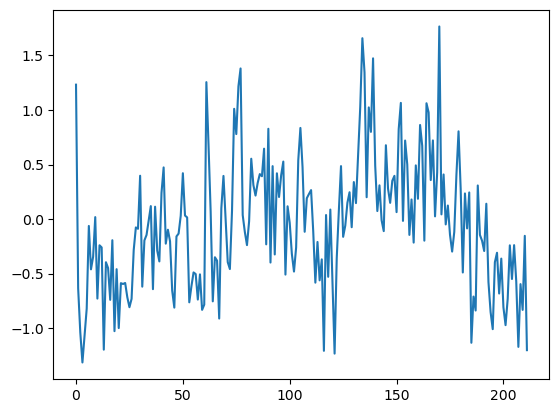

In [373]:
plt.plot(final_signal[:,2][1:])